# Khảo sát dữ liệu về 3 loại chim cánh cụt

Dữ liệu được cung cấp trong file **penguins-data.csv** được khảo sát các số đo của 3 loài chim cánh cụt trên 3 đảo (Biscoe, Dream, Torgersen)

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## 1. Đọc dữ liệu

Dữ liệu `penguins-data.csv` gồm các thông tin như sau:

- **species**: loại chim cánh cụt
- **island**: tên đảo mà chim cánh cụt đang sinh sống
- **bill_length_mm**: độ dài của mỏ (đơn vị: milimét)
- **bill_depth_mm**: độ sâu của mỏ (đơn vị: milimét)
- **flipper_length_mm**: độ dài của cánh (đơn vị: milimét)
- **body_mass_g**: trọng lượng cơ thể (đơn vị: gram)
- **sex**: giới tính của chim cánh cụt

Đọc dữ liệu

In [2]:
penguins_data = pd.read_csv('penguins-data.csv')

In [3]:
penguins_data.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


## 2. TÌM HIỂU DỮ LIỆU

### 2.1. Số lượng chim cánh cụt của mỗi loài

In [4]:
# Đếm số lượng chim cánh cụt theo loài
species_counts = penguins_data['species'].value_counts()

# Hiển thị kết quả
pd.DataFrame(species_counts)

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


### 2.2. Số lượng mỗi loài chim cánh cụt trên mỗi đảo

In [11]:
# Gom nhóm theo cột 'island' và 'species', sau đó đếm số lượng chim cánh cụt
island_species_counts = penguins_data.groupby(['island', 'species']).size()

# Hiển thị kết quả
pd.DataFrame(island_species_counts, columns=['count'])

count
island    species         
Biscoe    Adelie        44
          Gentoo       119
Dream     Adelie        55
          Chinstrap     68
Torgersen Adelie        47

### 2.3. Tính toán các đại lượng thống kê:

Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê:
- Giá trị trung bình, 

- Giá trị trung vị,

- Độ lệch chuẩn

Trên các thuộc tính như: 

- Độ dài của mỏ (bill_length_mm)

- Độ sâu của mỏ (bill_depth_mm)

- Độ dài của cánh (flipper_length_mm)

- Trọng lượng cơ thể (body_mass_g)

In [14]:
# Tính toán các đại lượng thống kê cho các thuộc tính theo từng loại chim cánh cụt
statistics = penguins_data.groupby('species').agg({
    'bill_length_mm': ['mean', 'median', 'std'],
    'bill_depth_mm': ['mean', 'median', 'std'],
    'flipper_length_mm': ['mean', 'median', 'std'],
    'body_mass_g': ['mean', 'median', 'std']
})

# Làm tròn 4 chữ số thập phân
statistics = statistics.round(4)

# In kết quả
pd.DataFrame(statistics)

bill_length_mm                bill_depth_mm                 \
                    mean median     std          mean median     std   
species                                                                
Adelie           38.8240  38.85  2.6626       18.3473  18.40  1.2193   
Chinstrap        48.8338  49.55  3.3393       18.4206  18.45  1.1354   
Gentoo           47.5681  47.40  3.1061       14.9966  15.00  0.9860   

          flipper_length_mm                body_mass_g                    
                       mean median     std        mean  median       std  
species                                                                   
Adelie             190.1027  190.0  6.5218   3706.1644  3700.0  458.6201  
Chinstrap          195.8235  196.0  7.1319   3733.0882  3700.0  384.3351  
Gentoo             217.2353  216.0  6.5854   5092.4370  5050.0  501.4762

## 3. Vẽ biểu đồ

### 3.1. Vẽ đồ thị phù hợp thể hiện phân phối của 3 loại chim cánh cụt. Qua đó, bạn hãy đưa ra bình luận của mình.

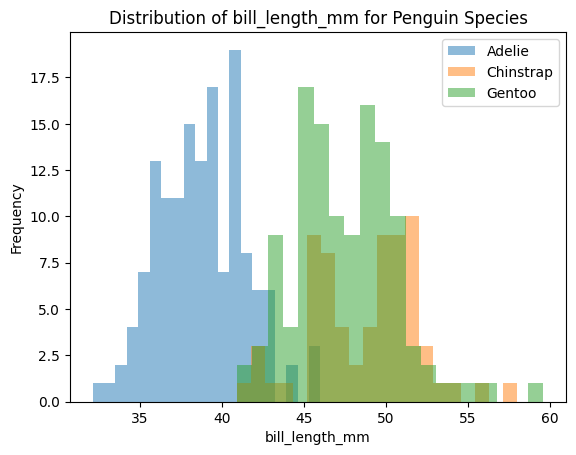

In [15]:
# Chọn dữ liệu của 3 loại chim cánh cụt: Adelie, Chinstrap, Gentoo
adelie_data = penguins_data[penguins_data['species'] == 'Adelie']
chinstrap_data = penguins_data[penguins_data['species'] == 'Chinstrap']
gentoo_data = penguins_data[penguins_data['species'] == 'Gentoo']

# Vẽ đồ thị phân phối cho thuộc tính 'bill_length_mm'
plt.hist(adelie_data['bill_length_mm'], bins=20, alpha=0.5, label='Adelie')
plt.hist(chinstrap_data['bill_length_mm'], bins=20, alpha=0.5, label='Chinstrap')
plt.hist(gentoo_data['bill_length_mm'], bins=20, alpha=0.5, label='Gentoo')

# Đặt tên cho các trục và tiêu đề đồ thị
plt.xlabel('bill_length_mm')
plt.ylabel('Frequency')
plt.title('Distribution of bill_length_mm for Penguin Species')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()

### 3.2. Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh và trọng lượng cơ thể của loài chim cánh cụt Gentoo:

### a) Theo bạn, hai đại lượng này có quan hệ với nhau hay không? Giải thích.

### b) Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến trọng lượng của loài chim cánh cụt Gentoo?

#### Scatter plot khảo sát mối quan hệ giữa độ dài cánh và trọng lượng cơ thể của loài chim cánh cụt Gentoo

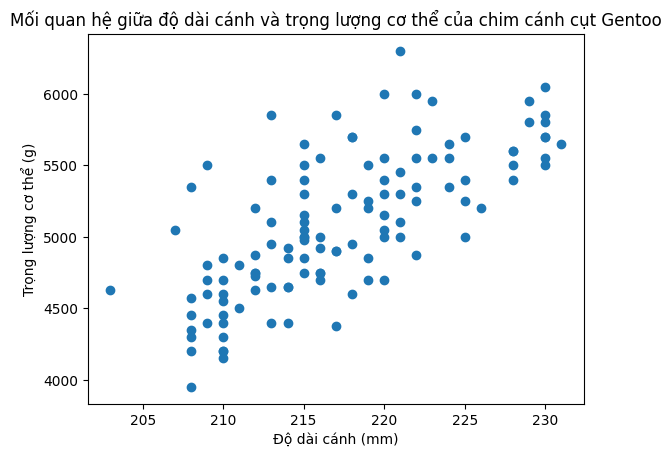

In [16]:
# Lấy dữ liệu của loài chim cánh cụt Gentoo
gentoo_data = penguins_data[penguins_data['species'] == 'Gentoo']

# Tạo đồ thị Scatter Plot
plt.scatter(gentoo_data['flipper_length_mm'], gentoo_data['body_mass_g'])
plt.xlabel('Độ dài cánh (mm)')
plt.ylabel('Trọng lượng cơ thể (g)')
plt.title('Mối quan hệ giữa độ dài cánh và trọng lượng cơ thể của chim cánh cụt Gentoo')

# Hiển thị đồ thị
plt.show()

**Nhận xét:**

Dựa vào đồ thị scatter plot, ta có thể nhận thấy một mối quan hệ dương khá mạnh giữa độ dài cánh và trọng lượng cơ thể của chim cánh cụt Gentoo. Cụ thể là khi độ dài cánh tăng, trọng lượng cơ thể cũng tăng. Điều này cho thấy có sự tương quan giữa hai đại lượng này.

#### Box plot khảo sát mối tương quan giữa độ dài mỏ, độ sâu mỏ có ảnh hưởng đến trọng lượng cơ thể của loài chim cánh cụt Gentoo hay không?

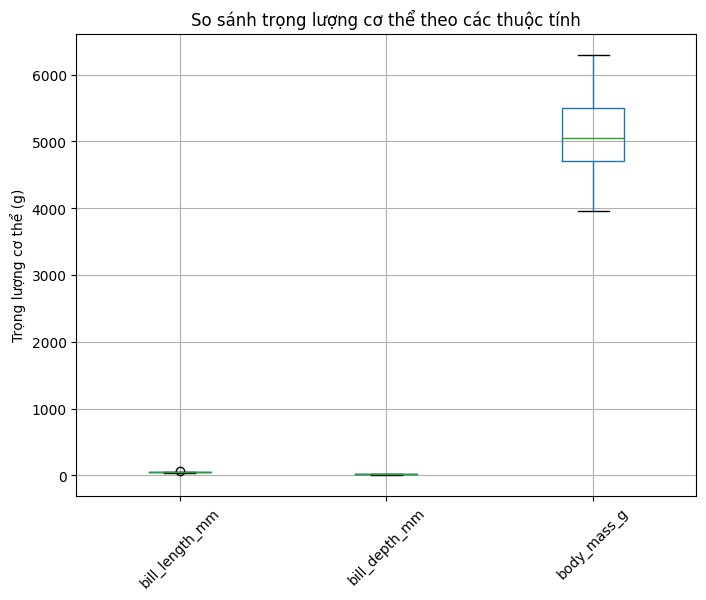

In [17]:
plt.figure(figsize=(8, 6))
data_attributes = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g']
box_data = gentoo_data[data_attributes]
box_data.boxplot()
plt.title('So sánh trọng lượng cơ thể theo các thuộc tính')
plt.ylabel('Trọng lượng cơ thể (g)')
plt.xticks(rotation=45)
plt.show()

Đồ thị box plot sẽ cho thấy phân bố trọng lượng cơ thể của chim cánh cụt Gentoo theo các thuộc tính khác. Những thuộc tính có box plot có sự khác biệt rõ rệt và độ biến động lớn có khả năng ảnh hưởng đến trọng lượng cơ thể của chim cánh cụt Gentoo.

**Nhận xét:** Các thuộc tính như độ dài mỏ (bill_length_mm) và độ sâu mỏ (bill_depth_mm) cũng có khả năng ảnh hưởng đến trọng lượng cơ thể của chim cánh cụt Gentoo, bên cạnh độ dài cánh.